In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
dt = pd.read_csv("screentime.csv")  
dt.head() 

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [4]:
dt.describe() 

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


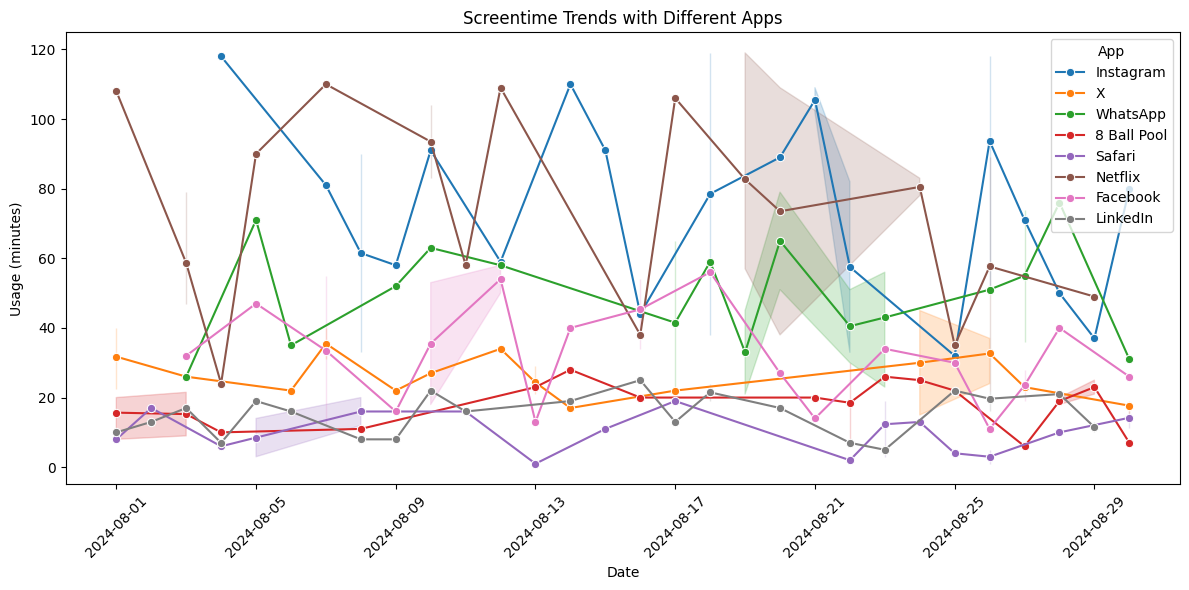

In [6]:
#Analysing Screentime trends with different Apps

dt['Date']= pd.to_datetime(dt['Date']) 

plt.figure(figsize = (12,6))
sns.lineplot(x='Date',y='Usage (minutes)',hue = 'App',data = dt,marker = "o") 
plt.title('Screentime Trends with Different Apps') 
plt.ylabel('Usage (minutes)')
plt.xlabel('Date') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 


<Figure size 800x600 with 0 Axes>

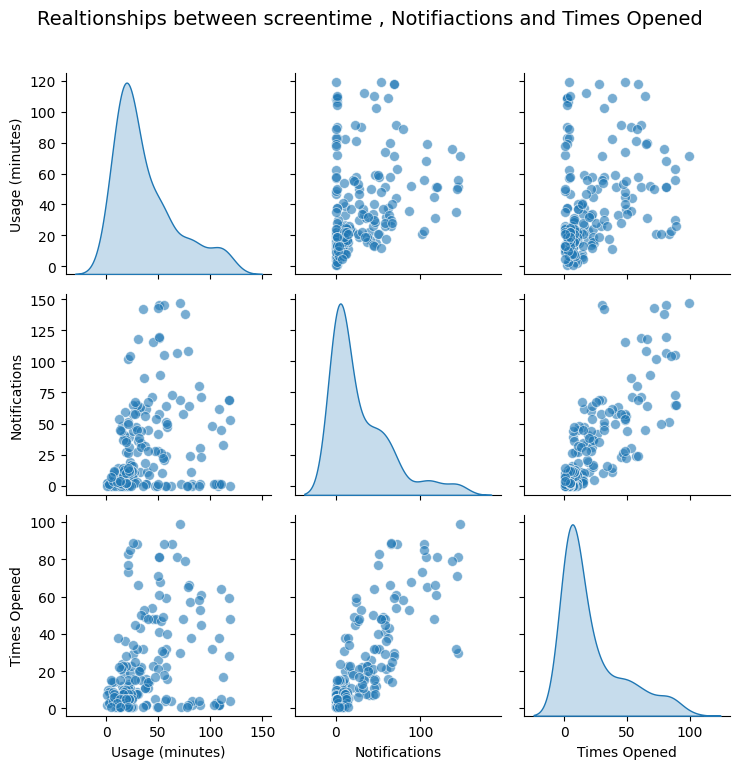

In [7]:
#Analysing the relationship between screentime ,notifications and no of times the particular App is opened 

plt.figure(figsize=(8,6)) 
pairplot = sns.pairplot(
    dt[['Usage (minutes)','Notifications','Times Opened']],
    kind = 'scatter',
    diag_kind = 'kde',
    plot_kws = {'alpha':0.6, 's':50} 
) 
pairplot.fig.suptitle('Realtionships between screentime , Notifiactions and Times Opened',y=1.02,fontsize = 14) 
plt.tight_layout() 
plt.show() 


In [4]:
#Analyzing top apps based on Screen time

app = dt.groupby('App').agg(
    avg_usage = ('Usage (minutes)','mean'),
    avg_notifications = ('Notifications','mean'),
    avg_times_opened = ('Times Opened','mean') 
).reset_index() 

app = app.sort_values(by = 'avg_usage',ascending = False) 
app 

,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


C:\Users\HP\AppData\Local\Temp\ipykernel_6660\3750345494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= usage_weekly.index , y = usage_weekly.values, palette = "crest" , legend = False )


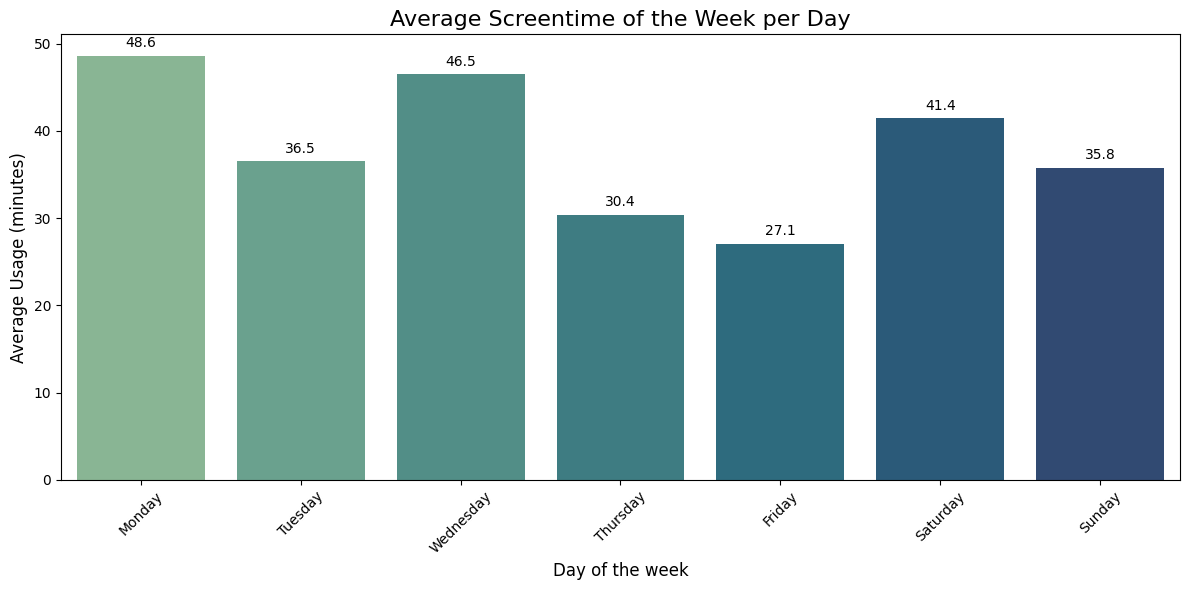

In [8]:
#Average screentime of the user by days/week 

dt['Day of Week'] = dt['Date'].dt.day_name() 
usage_weekly = dt.groupby('Day of Week')['Usage (minutes)'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) 

plt.figure(figsize = (12,6)) 

ax = sns.barplot(x= usage_weekly.index , y = usage_weekly.values, palette = "crest" , legend = False )

for i in ax.patches: 
    ax.annotate(format(i.get_height(), '.1f') ,
                (i.get_x() + i.get_width()/2. ,i.get_height()) ,
                ha = 'center', va = 'center' ,
                xytext = (0,9) , textcoords = 'offset points' )  


plt.title('Average Screentime of the Week per Day', fontsize =16) 
plt.ylabel('Average Usage (minutes)' , fontsize = 12) 
plt.xlabel('Day of the week', fontsize = 12) 
plt.xticks(rotation = 45 , fontsize = 10) 
plt.yticks(fontsize = 10 )  

plt.tight_layout() 
plt.show() 




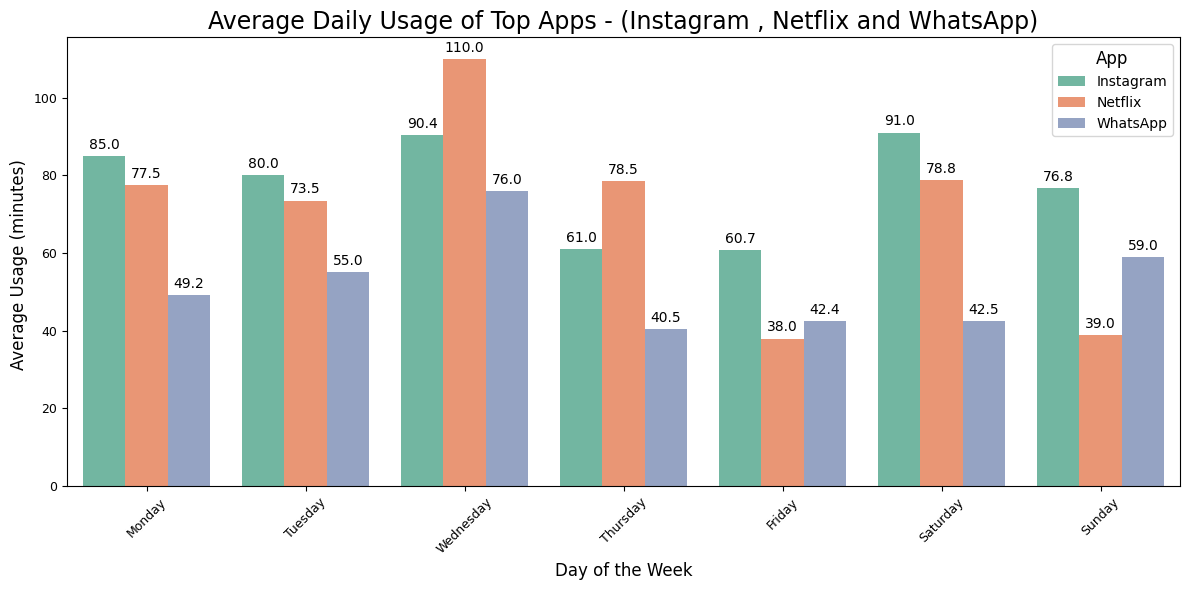

In [14]:
#Top - Apps daily patterns Analysis 

top_apps = dt[dt['App'].isin(['Instagram','Netflix','WhatsApp'])] 

usage_daily = top_apps.groupby(['App','Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram','Netflix','WhatsApp'],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']],
                               names= ['App','Day of Week'])).reset_index() 

plt.figure(figsize=(12,6)) 

gt = sns.barplot(x = 'Day of Week',y = 'Usage (minutes)' , hue = 'App', data = usage_daily , palette = 'Set2')

for j in gt.patches:
    height = j.get_height() 
    if height > 0:
        gt.annotate(f'{height:.1f}',
                    (j.get_x() +  j.get_width() /2.,height),
                    ha = 'center', va = 'center',
                    xytext = (0,8) , textcoords = 'offset points' ) 

plt.title("Average Daily Usage of Top Apps - (Instagram , Netflix and WhatsApp)",fontsize = 17) 
plt.ylabel("Average Usage (minutes) " ,fontsize = 12) 
plt.xlabel("Day of the Week" ,fontsize = 12) 
plt.xticks(rotation = 45, fontsize = 9) 
plt.yticks(fontsize = 9) 
plt.legend(title = 'App', fontsize = 10 , title_fontsize = 12)

plt.tight_layout() 
plt.show() 


In [16]:
#Calculating Probability of App Openings Through Notifictions 

notifdata = dt[dt['Notifications']>0] 

app_open_notif = notifdata.groupby('App').apply(
    lambda x : (x['Times Opened']>0).sum()/len(x) 
).reset_index(name = 'Probability of Apps Opened Through Notifications') 

app_open_notif 

C:\Users\HP\AppData\Local\Temp\ipykernel_6660\2568193977.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  app_open_notif = notifdata.groupby('App').apply(


,App,Probability of Apps Opened Through Notifications
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0
